### Домашняя работа к уроку 4
### Студент: Абрамов А.В.

Скачиваем датасет ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv)

1. объединить в одну выборку (это только для твитов), для роспотребнадзора сформировать датасет из вопросов
2. провести исследование и выявить тематики о которых говорят в твитах (для твитов), а для роспотребнадзора так же выявить тематики о которых люди пишут проанализировать
3. сделать визуализацию кластеров тематик
4. проинтерпритировать получившиеся тематики

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import nltk
import re
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
positive = pd.read_csv('positive.csv', sep=';', encoding='utf8', header=None)
positive = positive.rename(columns={3:'text'})
positive.head()

,0,1,2,text,4,5,6,7,8,9,10,11
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


In [3]:
negative = pd.read_csv('negative.csv', sep=';', encoding='utf8', header=None)
negative = negative.rename(columns={3:'text'})
negative.head()

,0,1,2,text,4,5,6,7,8,9,10,11
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


In [4]:
df = pd.concat([positive, negative], ignore_index=True)
df.tail()

,0,1,2,text,4,5,6,7,8,9,10,11
226829,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять:( http://...,-1,0,0,0,1138,32,46,0
226830,425138339503943682,1390195853,tkit_on,скучаю так :-( только @taaannyaaa вправляет мо...,-1,0,0,0,4822,38,32,0
226831,425138437684215808,1390195876,ckooker1,"Вот и в школу, в говно это идти уже надо(",-1,0,0,1,165,13,16,0
226832,425138490452344832,1390195889,LisaBeroud,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,0,1,0,2516,187,265,0
226833,425138595251625984,1390195914,sukapavlov,Такси везет меня на работу. Раздумываю приплат...,-1,0,0,0,7778,146,66,5


#### Preprocessing

In [5]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [8]:
df.text.iloc[1]

'Да, все-таки он немного похож на него. Но мой мальчик все равно лучше:D'

In [9]:
print(preprocess(df.text.iloc[1]))

['всё', 'таки', 'немного', 'похожий', 'мальчик', 'всё', 'равно', 'хороший']


In [10]:
data = df.sample(10000)

In [11]:
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [12]:
preprocessed_text2 = data['text'].progress_apply(lambda x: preprocess(str(x)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [13]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [14]:
data['text'] = preprocessed_text
data.sample(3)

,0,1,2,text,4,5,6,7,8,9,10,11
6772,409088848808148992,1386369356,dyfexatas,"[оказываться, второй, число, книга, сделать, с...",1,0,0,0,44,43,30,0
139115,411991184173985792,1387061327,Ladachka05,"[ааааааааааа, вернуть, ковтууун]",-1,0,1,0,1494,76,105,0
2300,408931058814832641,1386331736,Annnett12,"[mdobkin, batkivshchyna, історичні, перепалка,...",1,0,2,0,1656,21,220,0


#### LDA

In [16]:
from gensim.models import *
from gensim import corpora

In [17]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря
dictionary.save('tweets.dict')

In [18]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('tweets.model', corpus)

In [19]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

CPU times: total: 1.77 s
Wall time: 1.8 s


In [20]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.057*"сказать" + 0.050*"любимый" + 0.044*"писать" + 0.039*"пойти" + 0.036*"большой" + 0.032*"сколько" + 0.031*"купить" + 0.030*"скучать" + 0.025*"вчера" + 0.025*"девушка"'),
 (1,
  '0.266*"http" + 0.082*"весь" + 0.036*"время" + 0.030*"почему" + 0.023*"день" + 0.022*"плохо" + 0.019*"вопрос" + 0.018*"хотя" + 0.018*"читать" + 0.018*"видеть"'),
 (2,
  '0.123*"ещё" + 0.096*"день" + 0.059*"просто" + 0.044*"утро" + 0.042*"дом" + 0.033*"сделать" + 0.032*"час" + 0.028*"понимать" + 0.028*"добрый" + 0.023*"учить"'),
 (3,
  '0.198*"это" + 0.194*"всё" + 0.032*"думать" + 0.029*"делать" + 0.023*"нужно" + 0.023*"мама" + 0.022*"сидеть" + 0.020*"прийти" + 0.018*"играть" + 0.018*"понять"'),
 (4,
  '0.115*"хотеть" + 0.092*"очень" + 0.045*"школа" + 0.039*"посмотреть" + 0.036*"таки" + 0.025*"жаль" + 0.025*"работать" + 0.022*"нибыть" + 0.020*"учёба" + 0.019*"ладный"'),
 (5,
  '0.066*"мочь" + 0.058*"знать" + 0.044*"любить" + 0.038*"говорить" + 0.038*"самый" + 0.036*"спать" + 0.036*"идти" + 0.023*"жда

In [21]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

CPU times: total: 422 ms
Wall time: 1.98 s


In [22]:
print(lda.log_perplexity(corpus))

-6.856585742158741


In [23]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.0010525013123433478


In [24]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.48280646682406597


C:\ProgramData\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/3 [00:00<?, ?it/s]

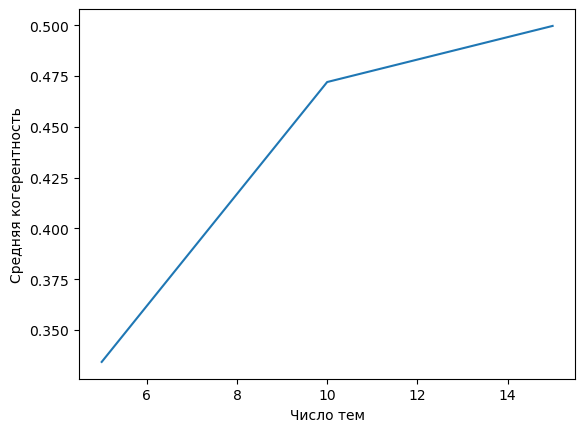

In [26]:
topics_list = [5, 10, 15]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

Вывод: средняя когерентность прямо пропорциональна числу тем в постах